# Covid_19 Data Analysis
Sources of Data : Keggle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Covid_19/covid_19_data.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


# Rename the columns

In [4]:
df.rename(columns={'Province/State': 'State', 'Country/Region': 'Country', 'ObservationDate':'Date'}, inplace=True)


In [7]:
df.head()

,SNo,Date,State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [9]:
#Earliest Cases
# Change datatype of some Columns
data = df
data['Confirmed'] = data['Confirmed'].astype(int)
data['Deaths'] = data['Deaths'].astype(int)
data['Recovered'] = data['Recovered'].astype(int)
data.head()

,SNo,Date,State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [10]:
df = data.groupby(["Date", "Country"])[['Date', 'Country',  'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df.head(10)

,Date,Country,Confirmed,Deaths,Recovered
0,01/22/2020,Hong Kong,0,0,0
1,01/22/2020,Japan,2,0,0
2,01/22/2020,Macau,1,0,0
3,01/22/2020,Mainland China,547,17,28
4,01/22/2020,South Korea,1,0,0
5,01/22/2020,Taiwan,1,0,0
6,01/22/2020,Thailand,2,0,0
7,01/22/2020,US,1,0,0
8,01/23/2020,Australia,0,0,0
9,01/23/2020,Brazil,0,0,0


# sort the confirmed cases 

In [11]:
sorted_By_Confirmed=df.sort_values('Confirmed',ascending=False)

# Drop Duplicate country name

In [12]:
sorted_By_Confirmed=sorted_By_Confirmed.drop_duplicates('Country')


In [13]:
world_Confirmed_Total=sorted_By_Confirmed['Confirmed'].sum()
world_Deaths_Total=sorted_By_Confirmed['Deaths'].sum()
world_Recovered_Total=sorted_By_Confirmed['Recovered'].sum()

# subtraction

Active=world_Confirmed_Total-world_Deaths_Total-world_Recovered_Total

veri={'Total Confirmed cases  in the world':world_Confirmed_Total,'Total Deaths cases in the world':world_Deaths_Total,
      'Total Recovered cases in the world':world_Recovered_Total,'Total Active Cases':Active}

veri=pd.DataFrame.from_dict(veri, orient='index' ,columns=['Total'])
print("27/03/2020") 
veri.style.background_gradient(cmap='Greens')

27/03/2020


,Total
Total Confirmed cases in the world,17860311
Total Deaths cases in the world,682773
Total Recovered cases in the world,10553550
Total Active Cases,6623988


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28761 entries, 0 to 28760
Data columns (total 5 columns):
Date         28761 non-null object
Country      28761 non-null object
Confirmed    28761 non-null int32
Deaths       28761 non-null int32
Recovered    28761 non-null int32
dtypes: int32(3), object(2)
memory usage: 786.5+ KB


In [15]:
sorted_By_Confirmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 28748 to 1995
Data columns (total 5 columns):
Date         223 non-null object
Country      223 non-null object
Confirmed    223 non-null int32
Deaths       223 non-null int32
Recovered    223 non-null int32
dtypes: int32(3), object(2)
memory usage: 7.8+ KB


# Calculate the rate of recovery, Deaths and Active cases

In [16]:
Recovered_rate=(sorted_By_Confirmed['Recovered']*100)/sorted_By_Confirmed['Confirmed']
Deaths_rate=(sorted_By_Confirmed['Deaths']*100)/sorted_By_Confirmed['Confirmed']
cases_rate=(sorted_By_Confirmed.Confirmed*100)/world_Confirmed_Total


In [17]:
sorted_By_Confirmed['Active']=sorted_By_Confirmed['Confirmed']-sorted_By_Confirmed['Deaths']-sorted_By_Confirmed['Recovered']
sorted_By_Confirmed['Recovered_Cases_Rate']=pd.DataFrame(Recovered_rate)
sorted_By_Confirmed['Deaths_Cases_Rate_%']=pd.DataFrame(Deaths_rate)
sorted_By_Confirmed['Total_Cases_Rate %']=pd.DataFrame(cases_rate)
print("Sorted By Confirmed Cases")
sorted_By_Confirmed.style.background_gradient(cmap='Reds')

Sorted By Confirmed Cases


In [ ]:
# world_Confirmed_Total=sorted_By_Confirmed['Confirmed'].sum()
# world_Deaths_Total=sorted_By_Confirmed['Deaths'].sum()
# world_Recovered_Total=sorted_By_Confirmed['Recovered'].sum()

# # subtraction

# Active

In [18]:
sorted_By_Confirmed.head()

,Date,Country,Confirmed,Deaths,Recovered,Active,Recovered_Cases_Rate,Deaths_Cases_Rate_%,Total_Cases_Rate %
28748,08/01/2020,US,4620444,154447,1461885,3004112,31.639492,3.342687,25.869897
28594,08/01/2020,Brazil,2707877,93563,2037982,576332,75.261247,3.455216,15.161421
28649,08/01/2020,India,1750723,37364,1145629,567730,65.437479,2.134204,9.802310
28712,08/01/2020,Russia,843890,14034,645316,184540,76.469208,1.663013,4.724946
28728,08/01/2020,South Africa,503290,8153,342461,152676,68.044467,1.619941,2.817924


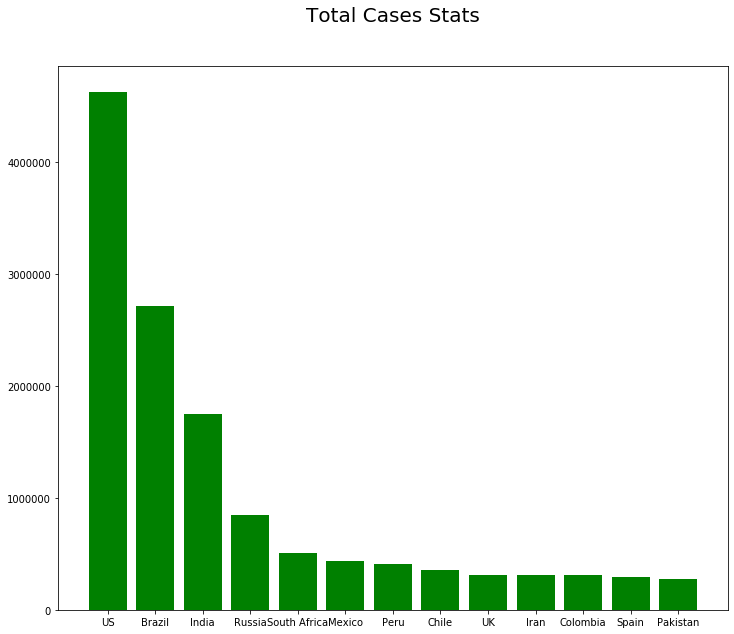

In [19]:

import matplotlib.pyplot as plt
sorted_By_Confirmed1=sorted_By_Confirmed.head(13)
x=sorted_By_Confirmed1.Country
y=sorted_By_Confirmed1.Confirmed
# plt.rcParams['figure.figsize'] = (12, 10)
fig, ax = plt.subplots(figsize=(12,10 ))

# fig.autofmt_xdate(float(x))
plt.bar(x,y, color='g')  #graf çizdir (Most popular)
plt.title('Total Cases Stats', pad=45, fontsize=20)
plt.show()

In [20]:
pakistan = df.loc[df['Country']=='Pakistan']
pakistan.head()

,Date,Country,Confirmed,Deaths,Recovered
961,02/26/2020,Pakistan,2,0,0
1013,02/27/2020,Pakistan,2,0,0
1074,02/28/2020,Pakistan,2,0,0
1136,02/29/2020,Pakistan,4,0,0
1204,03/01/2020,Pakistan,4,0,0


In [21]:
pakistan= pakistan.iloc[50: ,: ]
pakistan.head()

,Date,Country,Confirmed,Deaths,Recovered
8425,04/16/2020,Pakistan,6919,128,1645
8612,04/17/2020,Pakistan,7025,135,1765
8799,04/18/2020,Pakistan,7638,143,1832
8986,04/19/2020,Pakistan,8348,168,1868
9173,04/20/2020,Pakistan,8418,176,1970


In [22]:
pakistan.reset_index(drop=True,  inplace=True)
datetime= pd.to_datetime(pakistan['Date'])
confirmed = pakistan['Confirmed']
recovered = pakistan['Recovered']
deaths = pakistan['Deaths']
# datetime
confirmed

0        6919
1        7025
2        7638
3        8348
4        8418
5        9565
6       10076
7       11155
8       11940
9       12723
10      13328
11      13915
12      14612
13      15525
14      16817
15      18114
16      19103
17      20084
18      20941
19      22049
20      24073
21      24644
22      26435
23      28736
24      30334
25      32081
26      34336
27      35298
28      35788
29      38799
        ...  
78     221896
79     225283
80     231818
81     234509
82     237489
83     240848
84     243599
85     246351
86     248872
87     251625
88     253604
89     255769
90     257914
91     257914
92     261917
93     263496
94     265083
95     266096
96     267428
97     269191
98     270400
99     271887
100    273113
101    273113
102    274289
103    275225
104    276288
105    277402
106    278305
107    278305
Name: Confirmed, Length: 108, dtype: int32

# Pakistan Confirmed and Death Case Analysis

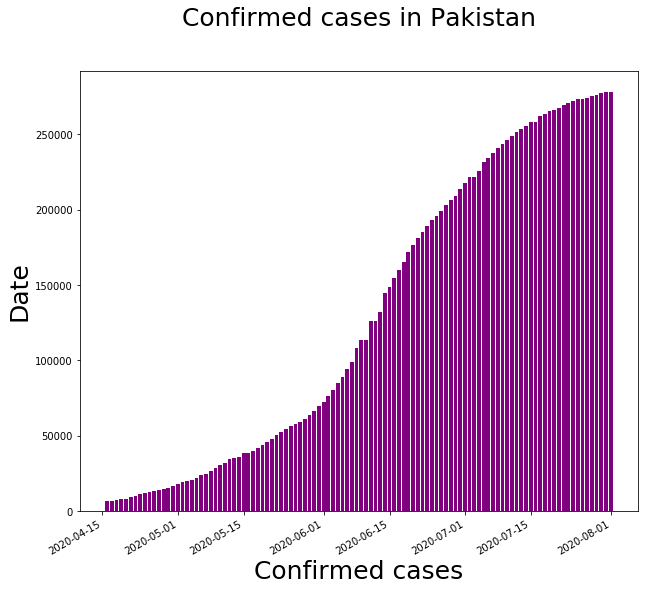

In [27]:
fig, ax = plt.subplots(figsize=(10, 9))

# Add x-axis and y-axis
ax.bar(datetime,
       confirmed,
       color='purple')

# Set title and labels for axes

plt.title("Confirmed cases in Pakistan", pad=45, fontsize=25)
plt.xlabel("Confirmed cases", fontsize=25)
plt.ylabel("Date", fontsize=25)

fig.autofmt_xdate()
plt.show()

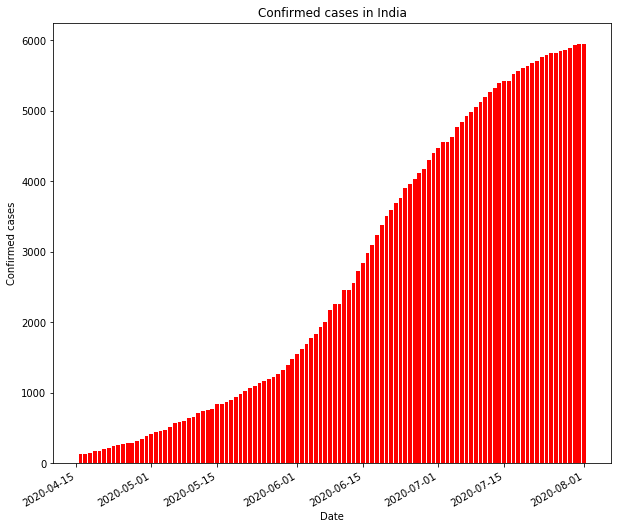

In [127]:
fig, ax = plt.subplots(figsize=(10, 9))

# Add x-axis and y-axis
ax.bar(datetime,
       deaths,
       color='red')

# Set title and labels for axes
plt.title("Deaths cases in Pakistan", pad=45, fontsize=25)
plt.xlabel("Death cases", fontsize=25)
plt.ylabel("Date", fontsize=25)

fig.autofmt_xdate()
plt.show()

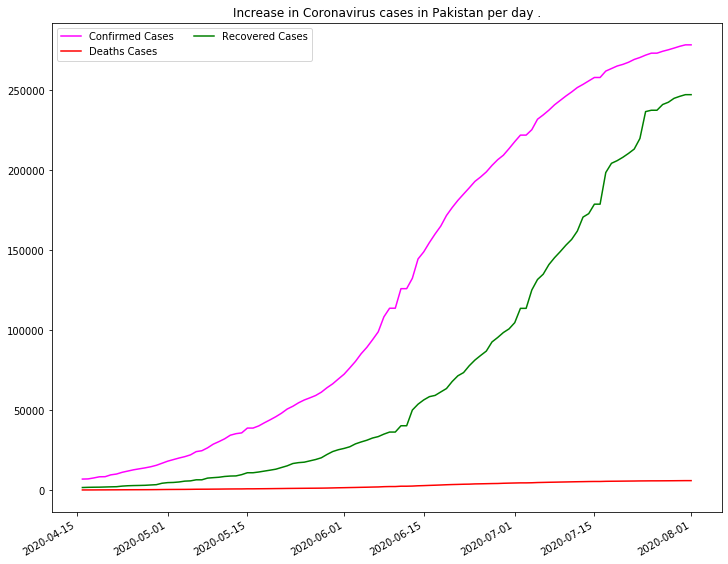

In [132]:
x=datetime
y=confirmed
y1=deaths
y2=recovered
# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(12,10 ))

fig.autofmt_xdate()
plt.plot(x,y,color='magenta' , label='Confirmed Cases')
plt.plot(x,y1,color='red' ,label="Deaths Cases")
plt.plot(x,y2,color='green',label="Recovered Cases")
plt.title("Increase in Coronavirus cases in Pakistan per day .")
ax.legend(ncol=2, loc='upper left', frameon=True)

plt.show()